In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import collections
import gensim
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
w2v_udb = gensim.models.KeyedVectors.load_word2vec_format(
    '../data/GoogleNews-vectors-negative300.bin', binary=True
)
w2v_db = gensim.models.KeyedVectors.load_word2vec_format(
    '../data/GoogleNews-vectors-negative300-hard-debiased.bin', binary=True
)

In [3]:
# text_classificationの前処理
for word in text.split():
    if word[-1] in [',', '.']:
        word = word[:-1]
    if word in w2v_model.key_to_index:
        get_embedding

NameError: name 'text' is not defined

In [6]:
# 1行目がcolumnになっちゃってたから直す
def refine_csv(path, lst):
    df = pd.read_csv(path)
    df = df.T
    df.insert(0, '-1', lst)
    df = df.T
    df.columns = range(101)
    df.to_csv(path, index=False)
# predの結果がaccの結果と合うか確認
def check_acc(df):
    return (df.T == df[df.columns[-1]]).T.sum()/len(df)

In [3]:
# dfのexp_id目の実験結果の混合行列を出力
def get_ConfusionMatrix(df, exp_id):
    return confusion_matrix(df[exp_id], df[df.columns[-1]])

In [4]:
# exp_id目の実験の誤分類したデータのベン図を出力
def get_VennDiagram(df_udb, df_db, exp_id):
    def get_MissClassified_id(df, exp_id):
        return df[df[exp_id] != df[df.columns[-1]]].index
    udb_ms = get_MissClassified_id(df_udb, exp_id)
    db_ms = get_MissClassified_id(df_db, exp_id)
    intersection = set(udb_ms) & set(db_ms)
    udb_only = set(udb_ms) - intersection
    db_only = set(db_ms) - intersection
    return intersection, udb_only, db_only

# AG_NEWS
ラベル：World (0), Sports (1), Business (2), Sci/Tech (3)

In [5]:
df_udb = pd.read_csv('../outputs/AGNEWS_20210610_pred_udb.csv')
df_udb

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
1,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
3,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7596,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
7597,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
7598,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [6]:
df_db = pd.read_csv('../outputs/AGNEWS_20210610_pred_db.csv')
df_db

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
1,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
3,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7596,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
7597,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
7598,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [7]:
with open('../outputs/AGNEWS_20210610_txtLst.txt', encoding='utf-8') as f:
    text_list = f.read().split('\n\n\n')

In [8]:
get_ConfusionMatrix(df_udb, '0')

array([[1696,   18,   64,   51],
       [  54, 1856,   11,   10],
       [  95,   16, 1627,  132],
       [  55,   10,  198, 1707]], dtype=int64)

In [9]:
get_ConfusionMatrix(df_db, '0')

array([[1662,   22,   61,   41],
       [  69, 1854,   13,   10],
       [ 108,   15, 1611,  153],
       [  61,    9,  215, 1696]], dtype=int64)

In [10]:
intersec, udb_only, db_only = get_VennDiagram(df_udb, df_db, '0')

In [11]:
print('両方間違い：', len(intersec))
print('udbのみ間違い：', len(udb_only))
print('dbのみ間違い：', len(db_only))

両方間違い： 656
udbのみ間違い： 58
dbのみ間違い： 121


In [16]:
for i in db_only:
    print('id-{}: 正解ラベル-{}, 分類結果-{}'.format(i, df_db['0'][i], df_db['100'][i]))
    print(text_list[i])
    break

id-1031: 正解ラベル-2, 分類結果-3
Aether Declines Higher Bid for Unit (washingtonpost.com) washingtonpost.com - Aether Systems Inc., a Maryland wireless data company that is selling off its operating units, said yesterday it received a  #36;30 million offer for a division it had already agreed to sell to another buyer for  #36;25 million.


## 間違いやすい単語群の分散表現の差を見る
例)worldをsportと分類してしまったもの

In [12]:
# trueをpredictedとして分類されているテキストのIDとその回数を出力
# 例：ID2は5回、ID4は10回、ID7は1回、クラス1に分類されるべきなのにクラス2に分類されてるなら
# input:1,2,df、output:{2:5,4:10,7:1}
def count_numMC(true, predicted, df):
    df = df[df['100'] == true]
    lst = []
    for i in range(100):
        idxs = df[df[str(i)] == 1][str(i)].index
        lst += list(idxs)
    return collections.Counter(lst)

In [13]:
# 閾値より大きいvalueのkeyを出力
# 例：input:{2:5,4:10,7:1},4、output:[2,4]
def get_keys(counter, threshold):
    return [k for k,v in counter.items() if v > threshold]

In [14]:
# counter1>counter2のキーとその差を出力, ignore以下の差は無視する
def get_worseID(counter1, counter2, ignore):
    dic = {}
    for k in counter1.keys():
        diff = counter1[k] - counter2[k]
        if diff > ignore:
            dic[k] = diff
    return sorted(dic.items(), key=lambda item: item[1], reverse=True)

In [15]:
def get_diff(text):
    result = {}
    for word in word_tokenize(text.lower()):
        if word in w2v_udb.key_to_index and word in w2v_db.key_to_index:
            ms_diff = ((w2v_udb[word] - w2v_db[word])**2).mean()
            abs_diff = np.abs(w2v_udb[word] - w2v_db[word])
            diff = w2v_udb[word] - w2v_db[word]
        elif word in w2v_udb.key_to_index and not word in w2v_db.key_to_index:
            word += '(undebiased only)'
            ms_diff = 0
            abs_diff = np.zeros(300)
            diff = np.zeros(300)
        elif not word in w2v_udb.key_to_index and word in w2v_db.key_to_index:
            word += '(debiased only)'
            ms_diff = 0
            abs_diff = np.zeros(300)
            diff = np.zeros(300)
        else:
            word += '(neither)'
            ms_diff = 0
            abs_diff = np.zeros(300)
            diff = np.zeros(300)
        result[word] = (ms_diff, abs_diff, diff)
    result = sorted(result.items(), key=lambda x:x[1][0], reverse=True)
    return result

In [49]:
# 文章の単語の分散表現の和でsortした
def show(idx, top, sort=False):
    print(text_list[idx])
    print(df_udb[idx:idx+1].values)
    print(df_db[idx:idx+1].values)
    diff = get_diff(text_list[idx])
    for i in diff:
        print(i[0], i[1][0])
    if sort:
        idx = np.argsort(np.stack([i[1][2] for i in diff]).sum(axis=0))
    for i in diff[:top]:
        fig = plt.figure(figsize=(15,3))
        ax1 = fig.add_subplot(121)
        if sort:
            y1 = i[1][2][idx]
        else:
            y1 = i[1][2]
        ax1.bar(range(1, 301), y1)
        ax1.plot(range(1, 301), [0]*300, color='black')
        ax1.tick_params(labelsize=16)
        ax2 = fig.add_subplot(122, sharey=ax1)
        if sort:
            y2 = i[1][1][idx]
        else:
            y2 = i[1][1]
        ax2.bar(range(1, 301), y2)
        ax2.plot(range(1, 301), [0]*300, color='black')
        ax2.tick_params(labelsize=16)
        fig.suptitle(i[0], fontsize=18)
        fig.show()

Jackson Squares Off With Prosecutor SANTA MARIA, Calif. - Fans of Michael Jackson erupted in cheers Monday as the pop star emerged from a double-decker tour bus and went into court for a showdown with the prosecutor who has pursued him for years on child molestation charges...
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]]
molestation 0.027930915
michael 0.026814124
prosecutor 0.023204891
santa 0.02181359
jackson 0.021351824
showdown 0.019103695
cheers 0.018137226
maria 0.017049177
erupted 0.015490265
tour 0.014311977
fans 0.013820238
bus 0.01318749
squares 0.01290735
charges 0.012269505
monday 0.012175984
pursued 0.010

<ipython-input-49-fe2855de84cb>:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


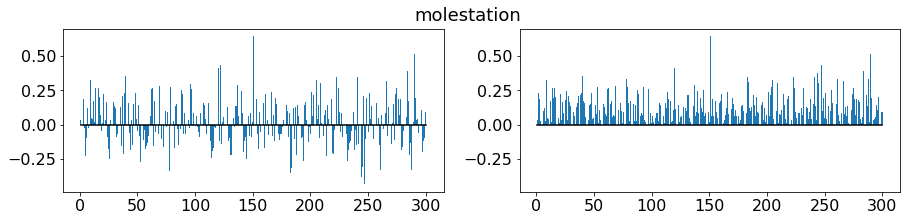

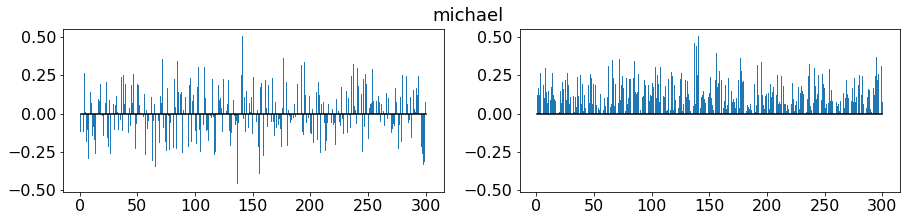

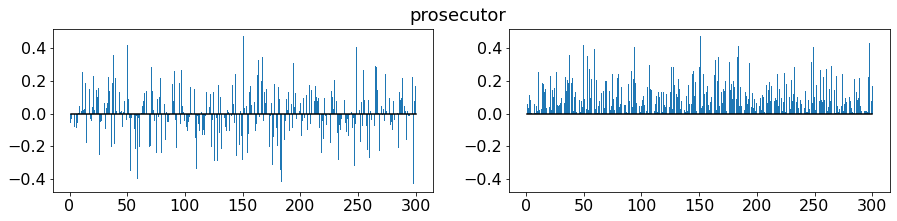

In [50]:
show(67, 3)

Schooling 'mix up' hits Portugal Schools across Portugal turn away pupils because of a teachers' assignment mix up on the first day of classes.
[[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]]
pupils 0.022716828
hits 0.017422073
schooling 0.015280523
teachers 0.013949137
classes 0.011096788
assignment 0.011053146
schools 0.0110185
portugal 0.007861877
mix 0.006099549
away 0.00594945
across 0.005472597
turn 0.004038576
up 0.0038106998
day 0.0026670683
first 0.0021007461
because 0.0017617125
on 0.0012239025
the 7.330973e-05
'mix(neither) 0
'(neither) 0
of(neither) 0
a(neither) 0
.(neither) 0


<ipython-input-49-fe2855de84cb>:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


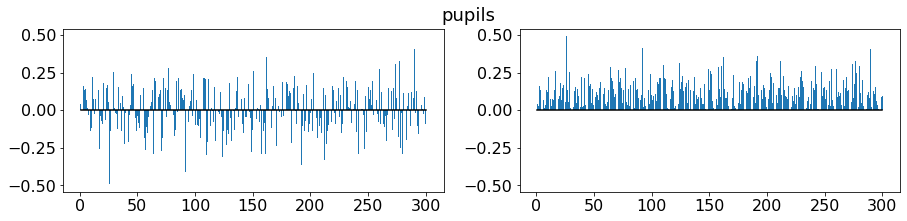

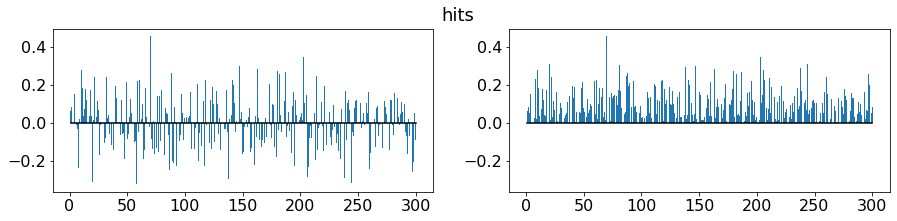

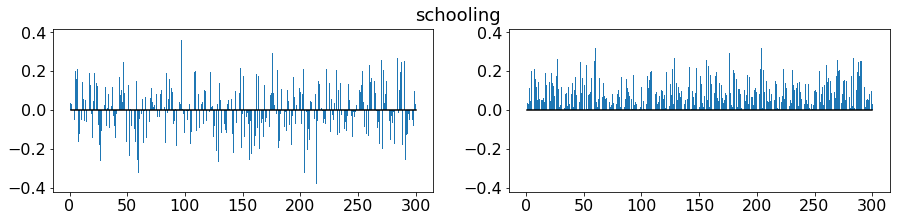

In [51]:
show(1866, 3)

In [26]:
c_db = count_numMC(0, 1, df_db)
c_udb = count_numMC(0, 1, df_udb)
print(sorted(set(c_db.values())))
print(sorted(set(c_udb.values())))

[1, 2, 3, 5, 8, 10, 15, 16, 20, 26, 27, 29, 30, 33, 38, 42, 46, 51, 62, 66, 69, 74, 77, 98, 99, 100]
[1, 2, 3, 4, 5, 8, 15, 20, 26, 36, 58, 100]


In [27]:
threshold = 70 # 何回間違えてたらだめかの閾値
print(get_keys(c_db, threshold))
print(get_keys(c_udb, threshold))

[67, 79, 88, 348, 355, 369, 372, 450, 584, 613, 614, 626, 676, 747, 833, 896, 967, 1080, 1466, 1533, 1617, 1866, 1976, 2028, 2468, 2591, 2656, 2738, 3063, 3186, 3563, 3570, 3657, 3661, 3688, 3746, 3805, 3899, 3900, 4027, 4029, 4549, 4669, 4734, 4900, 5128, 5384, 5892, 5941, 6089, 6093, 6150, 7077, 7238, 7467]
[79, 88, 348, 355, 369, 372, 450, 584, 613, 614, 626, 676, 747, 833, 896, 967, 1080, 1466, 1533, 1617, 1976, 2028, 2468, 2591, 2656, 2738, 2758, 3063, 3186, 3563, 3570, 3661, 3688, 3746, 3805, 3899, 3900, 4027, 4029, 4088, 4549, 4669, 4734, 4900, 5128, 5384, 5892, 5941, 6089, 6093, 6150, 7077, 7238]


In [28]:
get_worseID(c_db, c_udb, 3)

[(67, 98),
 (1866, 96),
 (7467, 77),
 (838, 65),
 (7471, 65),
 (6794, 62),
 (3657, 59),
 (893, 42),
 (650, 38),
 (6698, 30),
 (802, 29),
 (527, 28),
 (326, 27),
 (7459, 27),
 (4234, 26),
 (6218, 20),
 (87, 18),
 (1623, 15),
 (2290, 15),
 (511, 8),
 (3638, 7)]

In [30]:
get_worseID(c_udb, c_db, 3)

[(4088, 90), (2758, 84), (4302, 42), (3604, 6), (6145, 4)]

## SHAPを使ってみる

In [52]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchtext import data
from torchtext.datasets import AG_NEWS, DBpedia
import gensim
import shap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
from collections import Counter
from nltk.tokenize import word_tokenize
%matplotlib inline
shap.initjs()

In [10]:
train, test = DBpedia()
print(len(train))
print(len(test))

560000
70000


In [11]:
train_loader = DataLoader(train)
for i in train_loader:
    print(i)
    break

[tensor([1]), ('E. D. Abbott Ltd  Abbott of Farnham E D Abbott Limited was a British coachbuilding business based in Farnham Surrey trading under that name from 1929. A major part of their output was under sub-contract to motor vehicle manufacturers. Their business closed in 1972.',)]


In [82]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

w2v_undebiased = gensim.models.KeyedVectors.load_word2vec_format('../data/GoogleNews-vectors-negative300.bin', binary=True)
w2v_debiased = gensim.models.KeyedVectors.load_word2vec_format('../data/GoogleNews-vectors-negative300-hard-debiased.bin', binary=True)
w2v_dim = 300

def trans_text2vec(text, w2v_dim, w2v_model):
    x = torch.zeros(w2v_dim)
    count = 0
    for i, word in enumerate(text.split()):
        if word[-1] in [',', '.']:
            word = word[:-1]
        if word in w2v_model.key_to_index:
            x += w2v_model[word]
            count += 1
    if count > 0:
        x /= count
    return x

train_set, test_set = AG_NEWS()
num_class = 4 # 1~4

batch_size = 1000
num_epoch = 100

X_udb_train = torch.zeros(len(train_set), w2v_dim)
X_udb_test = torch.zeros(len(test_set), w2v_dim)

X_db_train = torch.zeros(len(train_set), w2v_dim)
X_db_test = torch.zeros(len(test_set), w2v_dim)

y_train = torch.zeros(len(train_set), dtype=int)
y_test = torch.zeros(len(test_set), dtype=int)

text_list = []

for i, (label, text) in enumerate(train_set):
    X_udb_train[i] += trans_text2vec(text, w2v_dim, w2v_undebiased)
    X_db_train[i] += trans_text2vec(text, w2v_dim, w2v_debiased)
    y_train[i] += label - 1

for i, (label, text) in enumerate(test_set):
    X_udb_test[i] += trans_text2vec(text, w2v_dim, w2v_undebiased)
    X_db_test[i] += trans_text2vec(text, w2v_dim, w2v_debiased)
    y_test[i] += label - 1
    text_list.append(text)

class MyDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.num_data = len(X)

    def __len__(self):
        return self.num_data

    def __getitem__(self, i):
        x = self.X[i]
        y = self.y[i]
        return x, y

udb_train_set = MyDataset(X_udb_train, y_train)
udb_test_set = MyDataset(X_udb_test, y_test)
db_train_set = MyDataset(X_db_train, y_train)
db_test_set = MyDataset(X_db_test, y_test)

udb_train_loader = DataLoader(udb_train_set, batch_size=batch_size, shuffle=True)
udb_test_loader = DataLoader(udb_test_set, batch_size=len(test_set))
db_train_loader = DataLoader(db_train_set, batch_size=batch_size, shuffle=True)
db_test_loader = DataLoader(db_test_set, batch_size=len(test_set))

class Classifier(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, num_class):
        super(Classifier, self).__init__()
        self.ln1 = nn.Linear(input_dim, hidden_dim1)
        self.ln2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.ln3 = nn.Linear(hidden_dim2, num_class)
    
    def forward(self, x):
        x = self.ln1(x)
        x = F.relu(x)
        x = self.ln2(x)
        x = F.relu(x)
        x = self.ln3(x)
        return x

print('\nundebiased model')
torch.manual_seed(0)

model = Classifier(w2v_dim, 150, 50, num_class).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

best_acc = 0
for epoch in range(num_epoch):
    model.train()
    train_loss = 0
    for X, y in udb_train_loader:
        X = X.to(device)
        y = y.to(device)
        pred = model(X)
        loss = loss_fn(pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss
    train_loss /= len(udb_train_loader)

    model.eval()
    with torch.no_grad():
        for X, y in udb_test_loader:
            X = X.to(device)
            y = y.to(device) 
            pred = model(X)
            loss = loss_fn(pred, y)
            acc = (torch.max(pred, dim=1).indices == y).sum() / len(udb_test_set)
    if epoch%10 == 0:
        print('Epoch{}\ttrain loss:{:.4}\ttest loss:{:.4}, acc:{:.4}'.format(epoch+1, train_loss, loss, acc))
    if acc > best_acc:
        best_acc = acc
        best_epoch = epoch+1
        udb_model = model
print('max acc: Epoch {}, {:.4}'.format(best_epoch, best_acc))

print('\ndebiased model')
torch.manual_seed(0)

model = Classifier(w2v_dim, 150, 50, num_class).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

best_acc = 0
for epoch in range(num_epoch):
    model.train()
    train_loss = 0
    for X, y in db_train_loader:
        X = X.to(device)
        y = y.to(device)
        pred = model(X)
        loss = loss_fn(pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss
    train_loss /= len(db_train_loader)

    model.eval()
    with torch.no_grad():
        for X, y in db_test_loader:
            X = X.to(device)
            y = y.to(device) 
            pred = model(X)
            loss = loss_fn(pred, y)
            acc = (torch.max(pred, dim=1).indices == y).sum() / len(db_test_set)
    if epoch%10 == 0:
        print('Epoch{}\ttrain loss:{:.4}\ttest loss:{:.4}, acc:{:.4}'.format(epoch+1, train_loss, loss, acc))
    if acc > best_acc:
        best_acc = acc
        best_epoch = epoch+1
        db_model = model
print('max acc: Epoch {}, {:.4}'.format(best_epoch, best_acc))


undebiased model
Epoch1	train loss:1.384	test loss:1.382, acc:0.445
Epoch11	train loss:0.4003	test loss:0.3975, acc:0.8667
Epoch21	train loss:0.3146	test loss:0.3242, acc:0.8939
Epoch31	train loss:0.2936	test loss:0.305, acc:0.8984
Epoch41	train loss:0.2835	test loss:0.2952, acc:0.8999
Epoch51	train loss:0.2773	test loss:0.2905, acc:0.9013
Epoch61	train loss:0.2731	test loss:0.2868, acc:0.902
Epoch71	train loss:0.2698	test loss:0.2845, acc:0.9037
Epoch81	train loss:0.2673	test loss:0.2826, acc:0.9047
Epoch91	train loss:0.2651	test loss:0.2808, acc:0.905
max acc: Epoch 92, 0.9058

debiased model
Epoch1	train loss:1.386	test loss:1.386, acc:0.2513
Epoch11	train loss:1.37	test loss:1.367, acc:0.7249
Epoch21	train loss:0.7434	test loss:0.7079, acc:0.7859
Epoch31	train loss:0.4309	test loss:0.4352, acc:0.8467
Epoch41	train loss:0.376	test loss:0.3857, acc:0.8688
Epoch51	train loss:0.346	test loss:0.3574, acc:0.8826
Epoch61	train loss:0.3254	test loss:0.3414, acc:0.887
Epoch71	train loss:0.

In [17]:
test_loader = udb_test_loader
model = udb_model.cpu()

In [126]:
def binning_classfication(data_loader, model, num_bin, x_min, x_maxs=None):
    def binning(series, bins):
        result = series.copy()
        for i in range(len(bins)-1):
            result[(bins[i] < result) & (result <= bins[i+1])] = i
        return result

    bins = [i/num_bin for i in range(num_bin+1)]
    colors = ['blue', 'red', 'orange', 'green']
    
    for X, y in data_loader:
        pass
    pred = F.softmax(model(X), dim=1)
    df = pd.DataFrame(pred.detach().numpy())
    df = df.add_prefix('class_')
    df['pred_label'] = pred.max(dim=1).indices
    df['true_label'] = y.numpy()
    labels = set(y.numpy())
    for l in labels:
        df['class_{}'.format(l)] = binning(df['class_{}'.format(l)], bins)
    df = df.astype(int)
    fig = plt.figure(figsize=(30,7))
    flag = True
    if x_maxs is None:
        x_maxs = []
        flag = False
    for j, l in enumerate(labels):
        ax = fig.add_subplot(1,4,j+1)
        right_data = df[df['pred_label']==l][['class_{}'.format(l), 'true_label']]
        top = np.zeros(num_bin)
        for i, l_ in enumerate(labels):
            counter = Counter(right_data[right_data['true_label']==l_]['class_{}'.format(l)])
            width = [counter[b] for b in range(num_bin)]
            ax.barh([(i+0.5)/num_bin for i in range(num_bin)], width, left=top, color=colors[i], label='class{}'.format(i), height=0.018)
            top += np.array(width)
        left_data = df[(df['true_label']==l) & (df['pred_label']!=l)][['class_{}'.format(l), 'pred_label']]
        bottom = np.zeros(num_bin)
        for i, l_ in enumerate(labels):
            counter = Counter(left_data[left_data['pred_label']==l_]['class_{}'.format(l)])
            width = [-counter[b] for b in range(num_bin)]
            ax.barh([(i+0.5)/num_bin for i in range(num_bin)], width, left=bottom, color=colors[i], height=0.018)
            bottom += np.array(width)
        ax.legend(loc='lower right', fontsize=18)
        ax.tick_params(labelsize=18)
        if flag:
            plt.xlim([x_min, x_maxs[j]])
        else:
            plt.xlim([x_min, top.max()+10])
            x_maxs.append(top.max()+10)
        plt.grid()
    return x_maxs

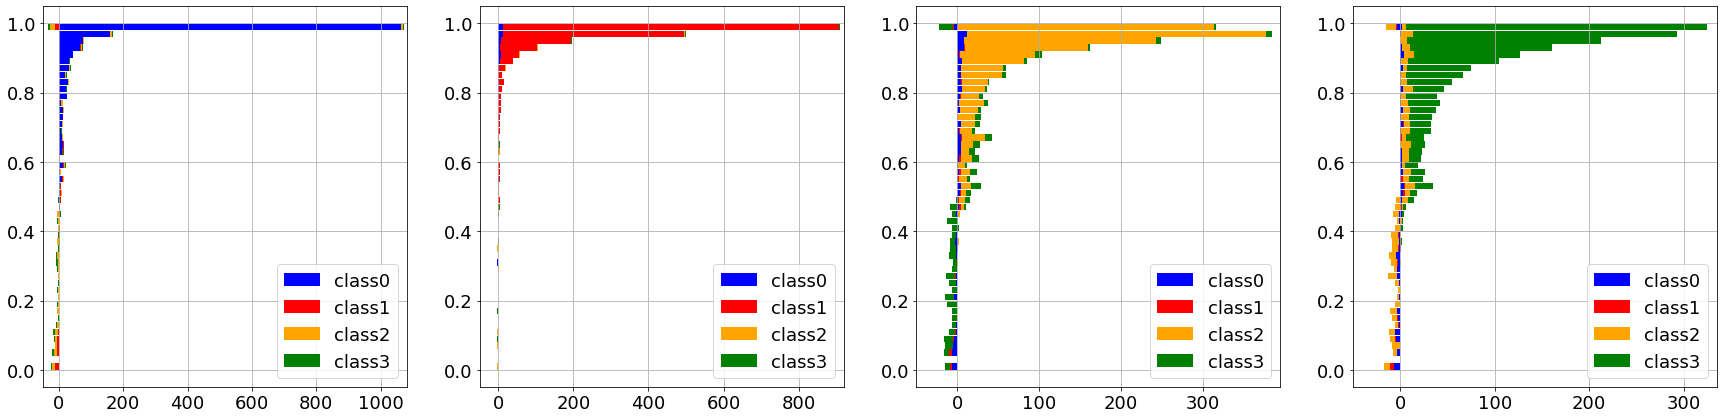

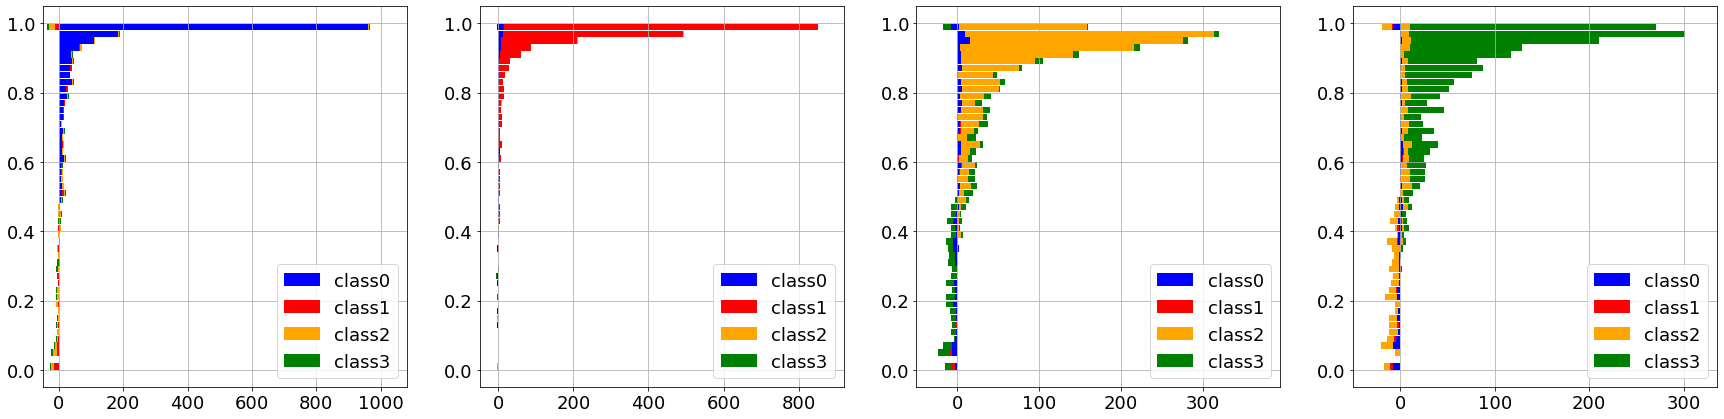

In [127]:
num_bin = 50
x_maxs = binning_classfication(udb_test_loader, udb_model.cpu(), num_bin, -50)
x_maxs = binning_classfication(db_test_loader, db_model.cpu(), num_bin, -50, x_maxs)

In [ ]:
X_udb, _ = next(iter(udb_test_loader))
udb_explainer = shap.DeepExplainer(udb_model.cpu(), X_udb)
udb_shap_values = udb_explainer.shap_values(X_udb)
np.savez('../outputs/SHAP_AGNEWS_exp1_udb',
         udb_shap_values[0], udb_shap_values[1], udb_shap_values[2], udb_shap_values[3])
X_db, _ = next(iter(db_test_loader))
db_explainer = shap.DeepExplainer(db_model.cpu(), X_db)
db_shap_values = db_explainer.shap_values(X_db)
np.savez('../outputs/SHAP_AGNEWS_exp1_db',
         db_shap_values[0], db_shap_values[1], db_shap_values[2], db_shap_values[3])

In [53]:
tmp = np.load('../outputs/SHAP_AGNEWS_exp1_udb.npz')
udb_shap_values = [tmp[i] for i in tmp.files]
tmp = np.load('../outputs/SHAP_AGNEWS_exp1_db.npz')
db_shap_values = [tmp[i] for i in tmp.files]

In [22]:
udb_model = udb_model.cpu()
db_model = db_model.cpu()

for X, _ in udb_test_loader:
    print(udb_model(X).detach().numpy())
    print(np.stack([(X.numpy() * udb_shap_values[i]).sum(axis=1) for i in range(4)], axis=1))

for X, _ in db_test_loader:
    print(db_model(X).detach().numpy())
    print(np.stack([(X.numpy() * db_shap_values[i]).sum(axis=1) for i in range(4)], axis=1))

[[ 0.9476545  -3.245273    4.316811   -1.5303044 ]
 [ 0.24949571 -3.89156    -1.1764094   5.113377  ]
 [-1.0293541  -3.2238483   1.048185    3.4683013 ]
 ...
 [ 0.20201531  4.421024   -1.4816943  -2.776556  ]
 [ 1.2046281  -4.0202985   4.6282487  -1.2969617 ]
 [-0.22757193 -7.2606196   4.3411417   3.7203522 ]]
[[ 5.05211051e-02 -8.02797724e-02  3.64429726e-03  2.76924856e-02]
 [ 2.86430888e-02  7.31960511e-02  1.26627489e-02 -1.12164194e-01]
 [ 5.89799358e-02  9.94412503e-02 -1.30656147e-01 -2.75452333e-02]
 ...
 [ 1.11711934e-01 -5.76580791e-02 -4.84290867e-02 -1.99365860e-03]
 [ 9.35264512e-02 -2.24818371e-02  7.49337395e-03 -7.39059537e-02]
 [-5.62698823e-02 -9.37479915e-02  1.51969418e-01 -4.01161644e-05]]
[[ 0.8858168  -3.3154845   3.8905656  -1.051939  ]
 [-0.8427975  -2.0355496  -0.658492    3.7599165 ]
 [-0.72298956 -2.9768877   1.0017326   2.9550881 ]
 ...
 [-0.11051276  3.955094   -1.6300308  -1.9501574 ]
 [ 1.1871948  -2.9502022   3.0535264  -0.8868926 ]
 [-0.644506   -5.922

In [54]:
# デバイアス前後のSHAPの散布図
# 入力：あるデータのあるクラスの全てのSHAP
def scatter(udb, db, abs_only=False):
    if abs_only:
        max_ = max(udb.max(), db.max(), np.abs(udb.min()), np.abs(db.min()))
        min_ = 0
    else:
        max_ = max(udb.max(), db.max())
        min_ = min(udb.min(), db.min())
    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(1,1,1)
    ax.plot([min_, max_], [0]*2, color='black', alpha=0.3)
    ax.plot([0]*2, [min_, max_], color='black', alpha=0.3)
    ax.plot([min_, max_], [min_, max_], color='black', alpha=0.3)
    if abs_only:
        ax.scatter(np.abs(udb), np.abs(db))
    else:
        ax.scatter(udb, db)
    ax.set_xlabel('SHAP undebiased')
    ax.set_ylabel('SHAP debiased')
    fig.show()

In [68]:
# デバイアス前後でSHAPが変化した次元のtopk
# 入力：あるデータのあるクラスの全てのSHAP
def diff(udb, db, k=10, abs_only=True):
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(1,1,1)
    if abs_only:
        diff = np.abs(np.abs(udb) - np.abs(db))
    else:
        diff = np.abs(udb - db)
    idx = diff.argsort()[-k:][::-1]
    ax.bar([str(i) for i in idx], [diff[i] for i in idx])
    ax.tick_params(labelsize=18)
    fig.show()

In [61]:
# デバイアス前とデバイアス後でそれぞれSHAP値の絶対値がtopkのやつの比較
# 入力：あるデータのあるクラスの全てのSHAP
def compare_topk(k, udb, db, sortby='id', w=0.4):
    idx = sorted(list(set(np.abs(udb).argsort()[-k:]) | set(np.abs(db).argsort()[-k:])))
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111)
    ax.set_xticks(list(range(len(idx))))
    x_udb = [i-w/2 for i in range(len(idx))]
    x_db = [i+w/2 for i in range(len(idx))]
    y_udb = [np.abs(udb[i]) for i in idx]
    y_db = [np.abs(db[i]) for i in idx]
    if sortby == 'id':
        ax.set_xticklabels([str(i) for i in idx], fontsize=18)
    elif sortby == 'undebiased':
        sort_id = [i[0] for i in sorted(enumerate(y_udb), key=lambda x:x[1], reverse=True)]
        idx = [idx[i] for i in sort_id]
        ax.set_xticklabels([str(i) for i in idx], fontsize=18)
        y_udb = [y_udb[i] for i in sort_id]
        y_db = [y_db[i] for i in sort_id]
    elif sortby == 'debiased':
        sort_id = [i[0] for i in sorted(enumerate(y_db), key=lambda x:x[1], reverse=True)]
        idx = [idx[i] for i in sort_id]
        ax.set_xticklabels([str(i) for i in idx], fontsize=18)
        y_udb = [y_udb[i] for i in sort_id]
        y_db = [y_db[i] for i in sort_id]
    ax.bar(x_udb, y_udb, label='undebiased', color='cornflowerblue', width=w)
    ax.bar(x_db, y_db, label='debiased', color='tomato', width=w)
    ax.legend(fontsize=18)
    ax.tick_params(labelsize=18)
    fig.show()

In [57]:
# デバイアス前後のSHAPの全体的な傾向
# 入力：あるデータの全てのクラスのSHAP(list)
def tendency(udb, db, threshold=0, abs_only=True):
    for i in range(4):
        print('class:', i)
        if abs_only:
            diff = np.abs(db[i]) - np.abs(udb[i])
        else:
            diff = db[i] - udb[i]
        diff = np.where(np.abs(diff) < threshold, 0, diff)
        print('decrease:', (diff < 0).sum())
        print('increase:', (diff > 0).sum())
        if abs_only:
            udb_min = np.abs(udb[i]).min()
            udb_max = np.abs(udb[i]).max()
            db_min = np.abs(db[i]).min()
            db_max = np.abs(db[i]).max()
        else:
            udb_min = udb[i].min()
            udb_max = udb[i].max()
            db_min = db[i].min()
            db_max = db[i].max()
        print('range: {:.2f}~{:.2f} -> {:.2f}~{:.2f}'.format(udb_min, udb_max, db_min, db_max))

In [58]:
# デバイアス前後でSHAPの絶対値が閾値以上に減ってるものと増えてるものどちらが多いか
def tendency_all(udb, db, threshold):
    num_class = len(udb)
    lst = []
    for c in range(num_class):
        print('class', c)
        diff = np.abs(db[c]) - np.abs(udb[c])
        diff = np.where(np.abs(diff) < threshold, 0, diff)
        dec = (diff < 0).sum(axis=1)
        inc = (diff > 0).sum(axis=1)
        print('decrease', (dec > inc).sum())
        print('increase', (inc > dec).sum())

In [80]:
# SHAP値のヒストグラムを表示
# udb, db：1次元配列
def hist(udb, db, num_bin):
    def var(arr):
        return (arr**2).sum() / len(arr)
    shap_min = min(udb.min(), db.min())
    shap_max = min(udb.max(), db.max())
    bins = np.linspace(shap_min, shap_max, num_bin)
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111)
    ax.hist(udb, bins=bins, label='undebiased:{:.4f}'.format(var(udb)), alpha=0.5)
    ax.hist(db, bins=bins, label='debiased:{:.4f}'.format(var(db)), alpha=0.5)
    ax.legend(fontsize=16)
    ax.set_yscale('log')
    ax.tick_params(labelsize=18)
    fig.show()

In [60]:
def W2V_dim(w2v_model, dim, num_bin, k, filtering=None, dataset=None):
    keys = w2v_model.key_to_index.keys()
    if filtering is not None:
        corpus = ''
        for data in dataset:
            corpus = corpus + data[1] + ' '
        counter = Counter(word_tokenize(corpus.lower()))
        keys = [k for k in keys if counter[k] > filtering]
    dic = {k: w2v_model[k][dim] for k in keys}
    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(111)
    ax.hist(dic.values(), num_bin)
    ax.set_yscale('log')
    fig.show()
    sorted_dic = sorted(dic.items(), key=lambda x:x[1])
    print('worst {} words:'.format(k))
    for i in sorted_dic[:k]:
        print('{}:{:.4f}'.format(i[0], i[1]))
    print()
    print('top {} words:'.format(k))
    for i in sorted_dic[::-1][:k]:
        print('{}:{:.4f}'.format(i[0], i[1]))
    print()

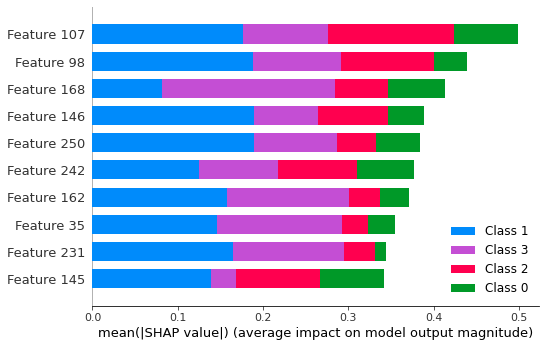

In [12]:
# 各クラスに対する各特徴量の寄与率を表示
shap.summary_plot(udb_shap_values, max_display=10)

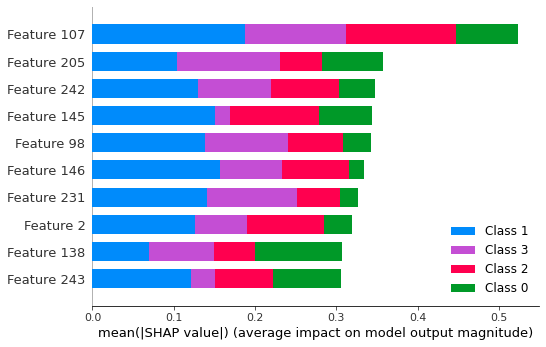

In [13]:
shap.summary_plot(db_shap_values, max_display=10)

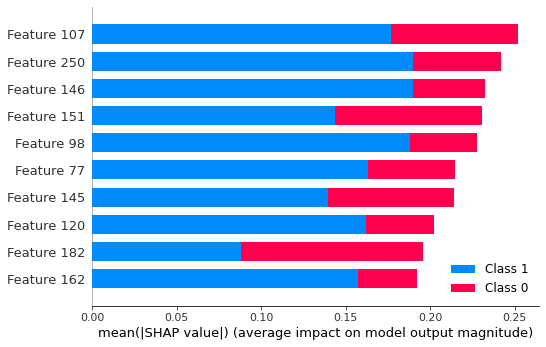

In [14]:
shap.summary_plot(udb_shap_values[:2], max_display=10)

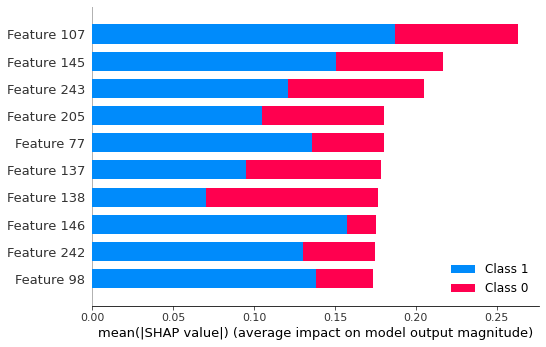

In [15]:
shap.summary_plot(db_shap_values[:2], max_display=10)

In [24]:
shap.summary_plot(udb_shap_values[0], max_display=20, plot_type='bar')

AssertionError: Summary plots need a matrix of shap_values, not a vector.

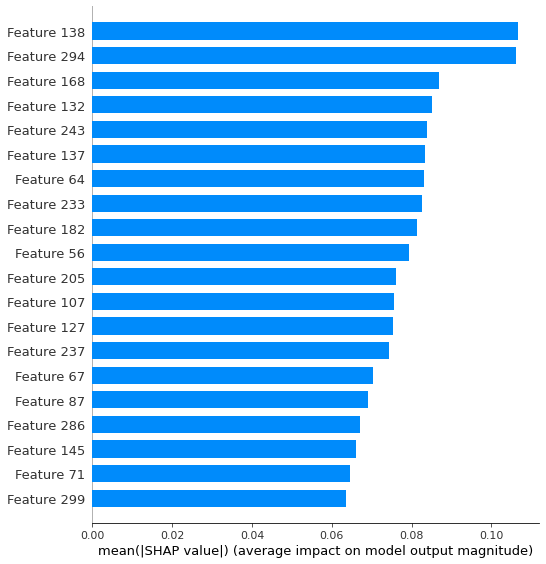

In [17]:
shap.summary_plot(db_shap_values[0], max_display=20, plot_type='bar')

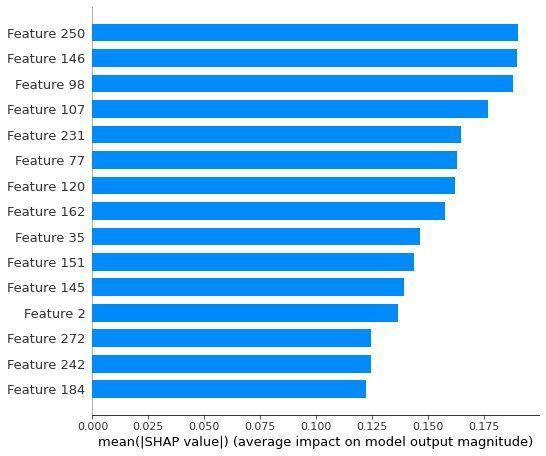

In [18]:
shap.summary_plot(udb_shap_values[1], max_display=15, plot_type='bar')

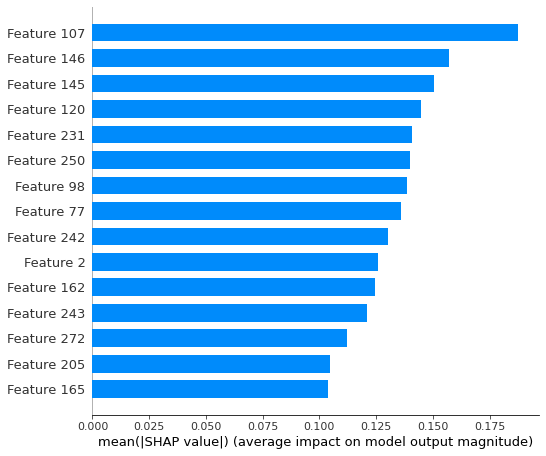

In [19]:
shap.summary_plot(db_shap_values[1], max_display=15, plot_type='bar')

In [72]:
data_id = 1866

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


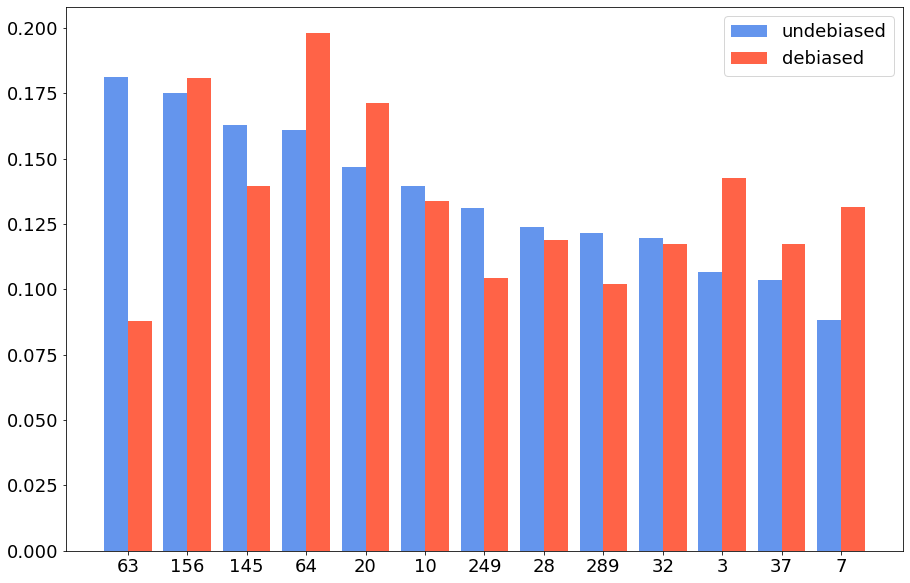

In [73]:
compare_topk(10, udb_shap_values[0][data_id], db_shap_values[0][data_id], sortby='undebiased')

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


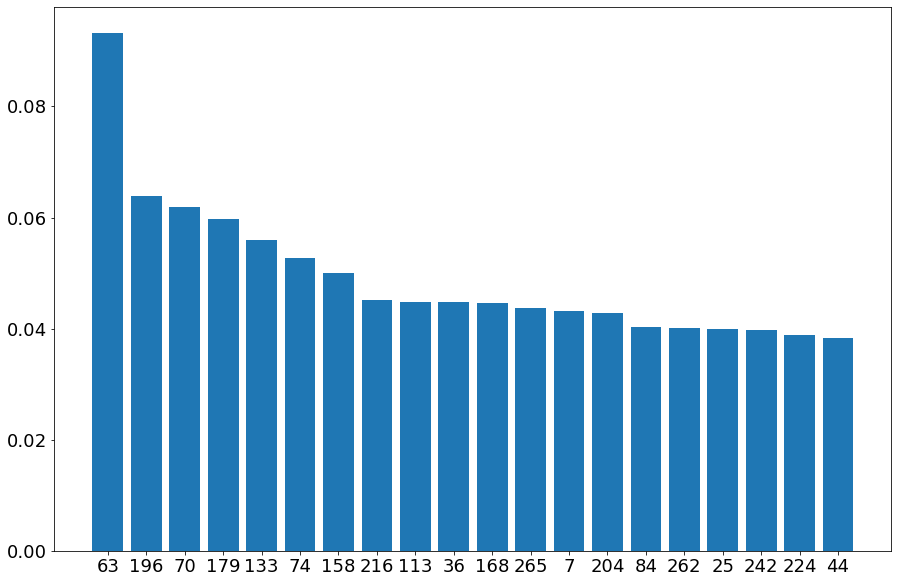

In [74]:
diff(udb_shap_values[0][data_id], db_shap_values[0][data_id], k=20)

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


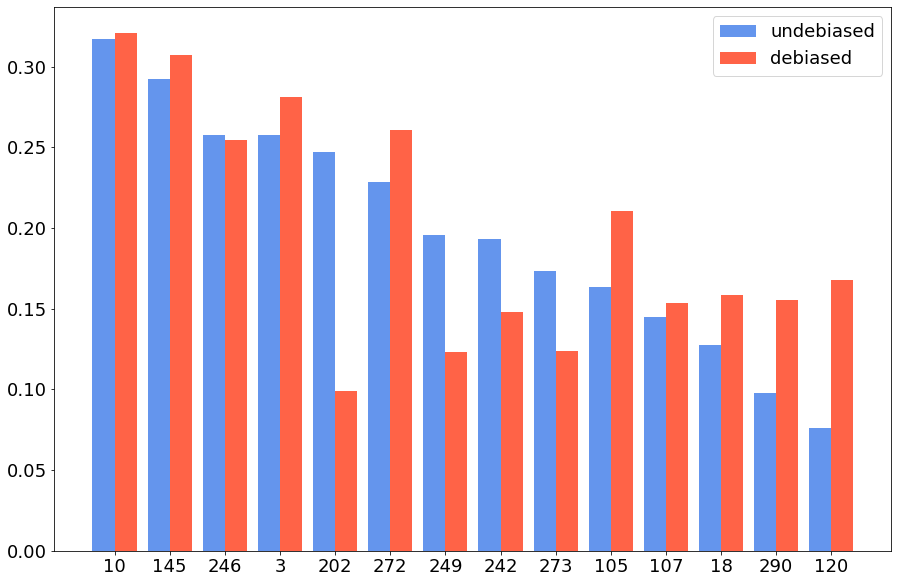

In [75]:
compare_topk(10, udb_shap_values[1][data_id], db_shap_values[1][data_id], sortby='undebiased')

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


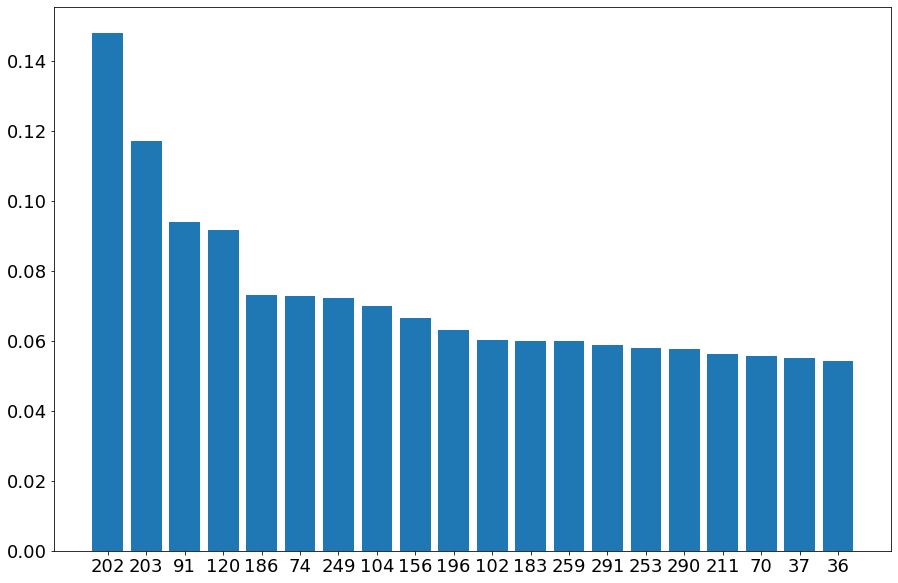

In [76]:
diff(udb_shap_values[1][data_id], db_shap_values[1][data_id], k=20)

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


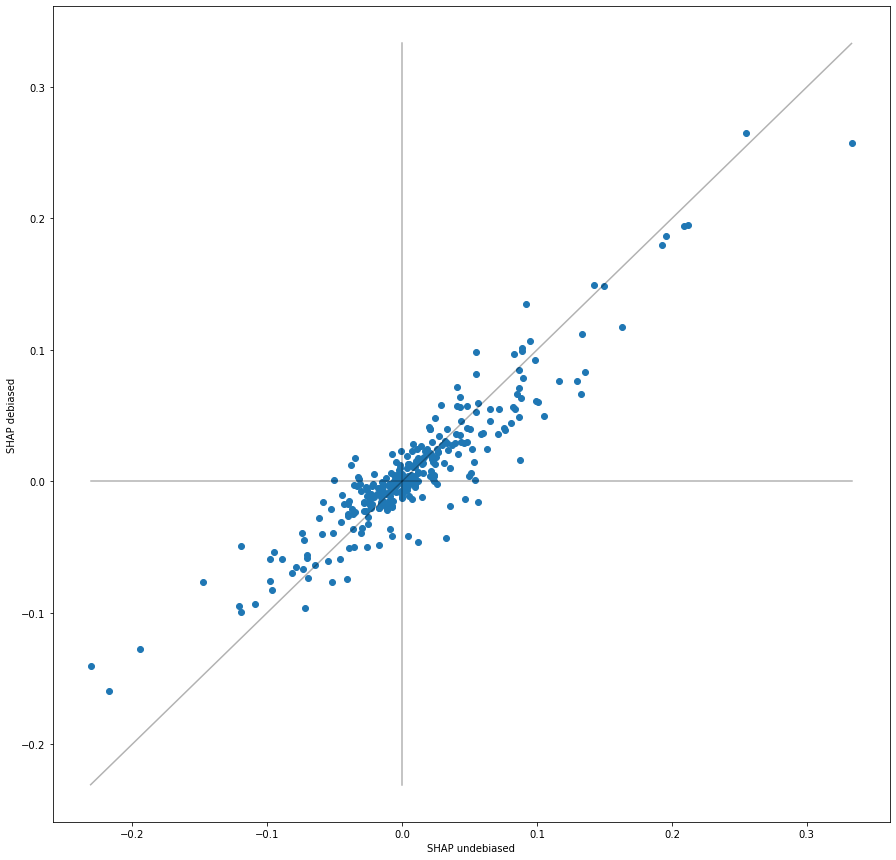

In [50]:
scatter(udb_shap_values[1][data_id], db_shap_values[1][data_id])

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


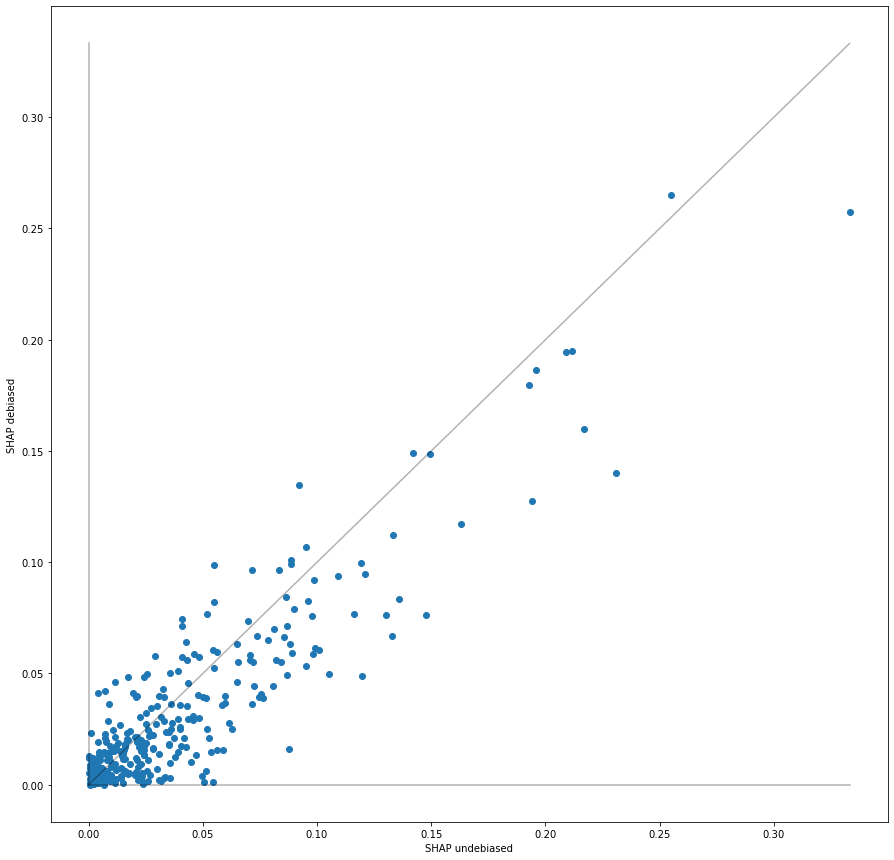

In [54]:
scatter(udb_shap_values[1][data_id], db_shap_values[1][data_id], abs_only=True)

In [55]:
tendency([udb_shap_values[i][data_id] for i in range(4)],
         [db_shap_values[i][data_id] for i in range(4)],
         threshold=0, abs_only=True)

class: 0
decrease: 170
increase: 130
range: 0.00~0.17 -> 0.00~0.15
class: 1
decrease: 198
increase: 102
range: 0.00~0.33 -> 0.00~0.26
class: 2
decrease: 183
increase: 117
range: 0.00~0.23 -> 0.00~0.21
class: 3
decrease: 190
increase: 110
range: 0.00~0.23 -> 0.00~0.16


In [56]:
tendency([udb_shap_values[i][data_id] for i in range(4)],
         [db_shap_values[i][data_id] for i in range(4)],
         threshold=0.025, abs_only=True)

class: 0
decrease: 29
increase: 8
range: 0.00~0.17 -> 0.00~0.15
class: 1
decrease: 49
increase: 11
range: 0.00~0.33 -> 0.00~0.26
class: 2
decrease: 39
increase: 9
range: 0.00~0.23 -> 0.00~0.21
class: 3
decrease: 44
increase: 6
range: 0.00~0.23 -> 0.00~0.16


In [57]:
tendency_all(udb_shap_values, db_shap_values, 0)

class 0
decrease 7257
increase 304
class 1
decrease 7422
increase 151
class 2
decrease 7235
increase 324
class 3
decrease 7514
increase 69


In [58]:
tendency_all(udb_shap_values, db_shap_values, 0.025)

class 0
decrease 7289
increase 255
class 1
decrease 7445
increase 141
class 2
decrease 7324
increase 233
class 3
decrease 7541
increase 52


Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


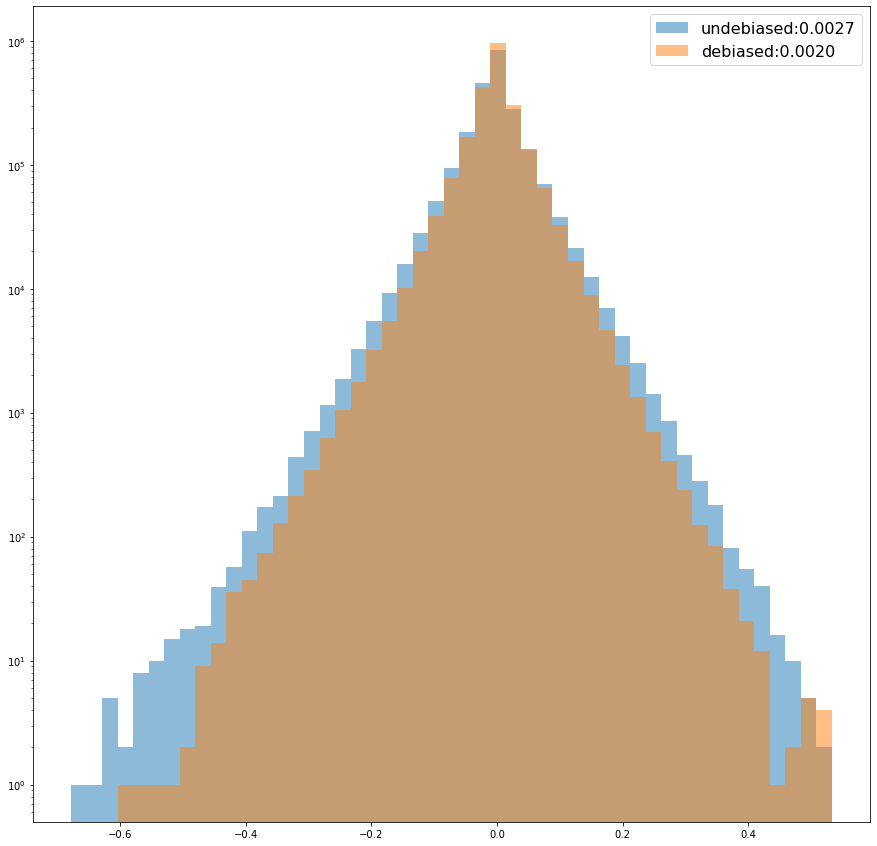

In [12]:
hist(udb_shap_values[0].reshape(-1), db_shap_values[0].reshape(-1), 50)

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


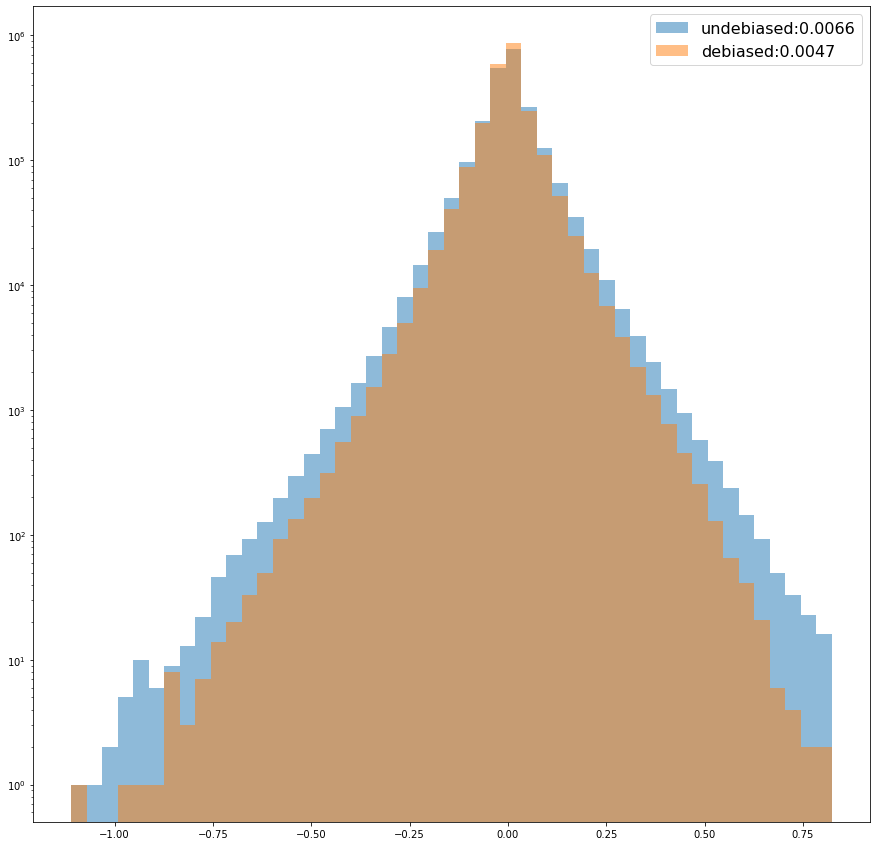

In [14]:
hist(udb_shap_values[1].reshape(-1), db_shap_values[1].reshape(-1), 50)

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


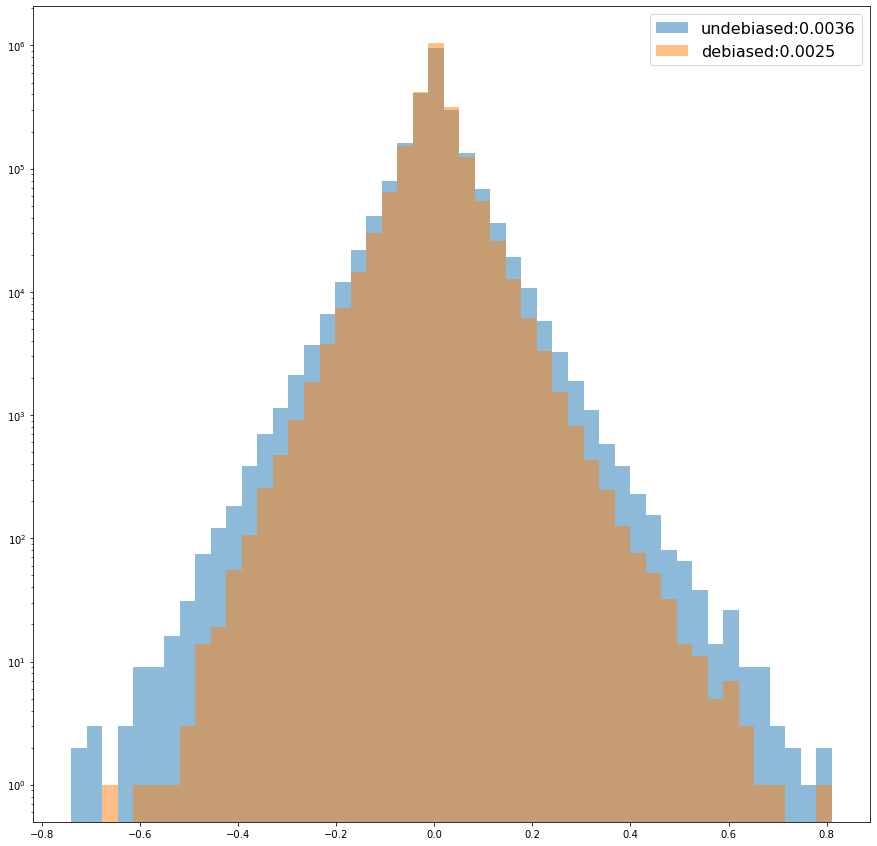

In [15]:
hist(udb_shap_values[2].reshape(-1), db_shap_values[2].reshape(-1), 50)

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


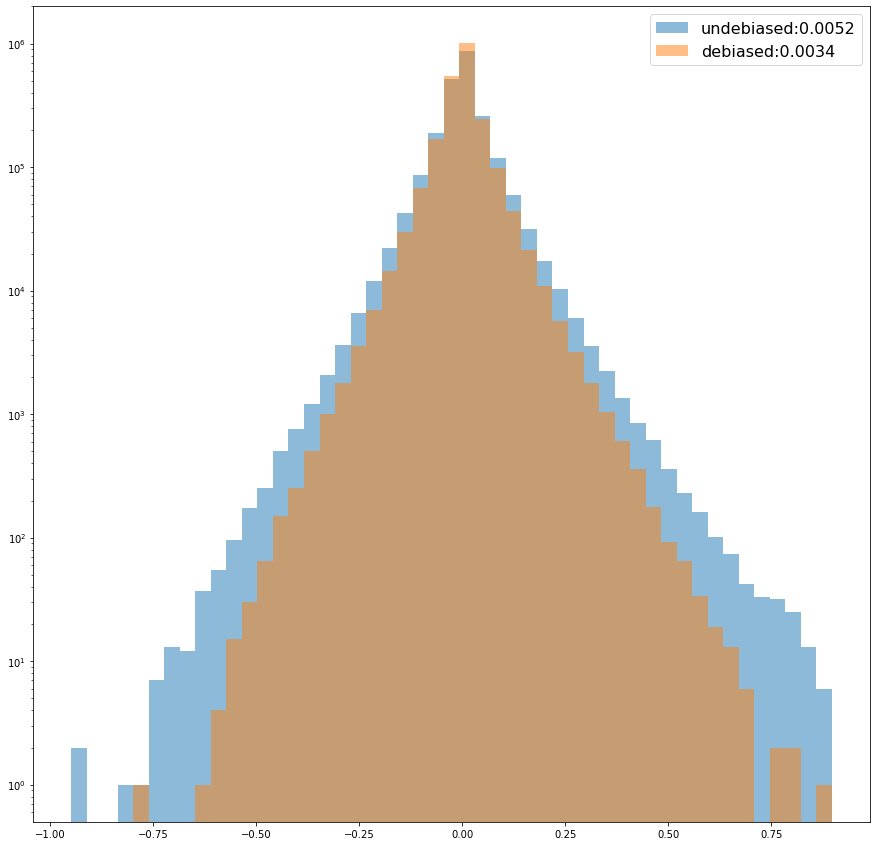

In [16]:
hist(udb_shap_values[3].reshape(-1), db_shap_values[3].reshape(-1), 50)

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


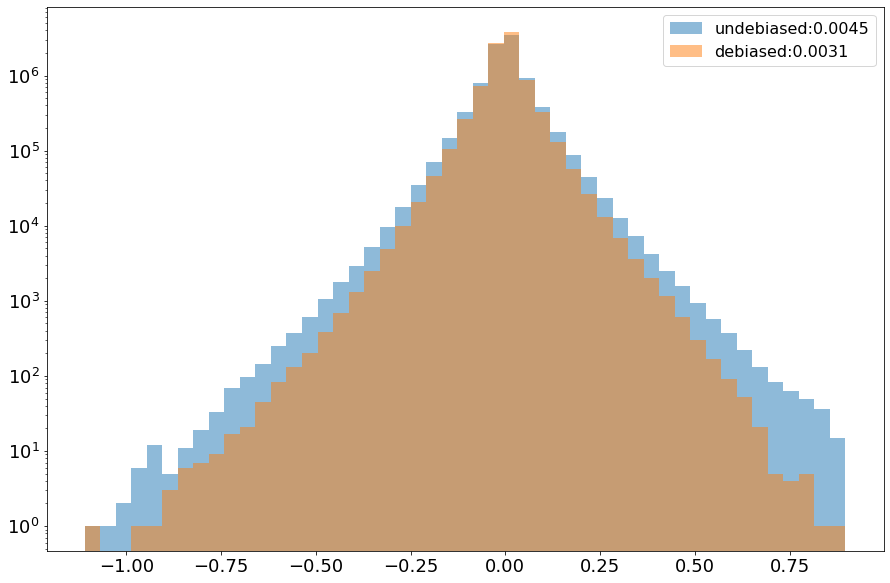

In [81]:
hist(np.stack([udb_shap_values[i] for i in range(4)]).reshape(-1), np.stack([db_shap_values[i] for i in range(4)]).reshape(-1), 50)

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


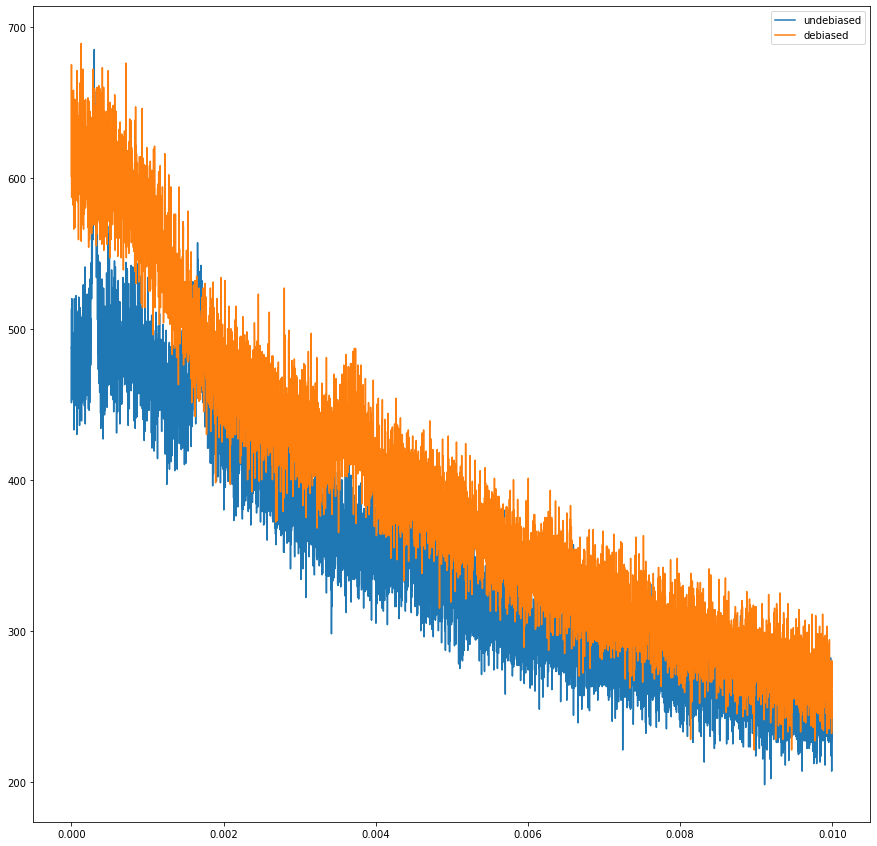

In [55]:
udb = np.stack(udb_shap_values).reshape(-1)
db = np.stack(db_shap_values).reshape(-1)
num_div = 1000000
threshold = 0.01

max_ = max(np.abs(udb).max(), np.abs(db).max())
if not threshold:
    threshold = max_
width = max_ / num_div
x = []
y_udb = []
y_db = []
for i in range(num_div):
    if width/2 + width*i < threshold:
        x.append(width/2 + width*i)
        y_udb.append(np.bitwise_and(width*i < np.abs(udb), np.abs(udb) < width*(i+1)).sum())
        y_db.append(np.bitwise_and(width*i < np.abs(db), np.abs(db) < width*(i+1)).sum())
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
ax.plot(x, y_udb, label='undebiased')
ax.plot(x, y_db, label='debiased')
ax.legend()
fig.show()

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


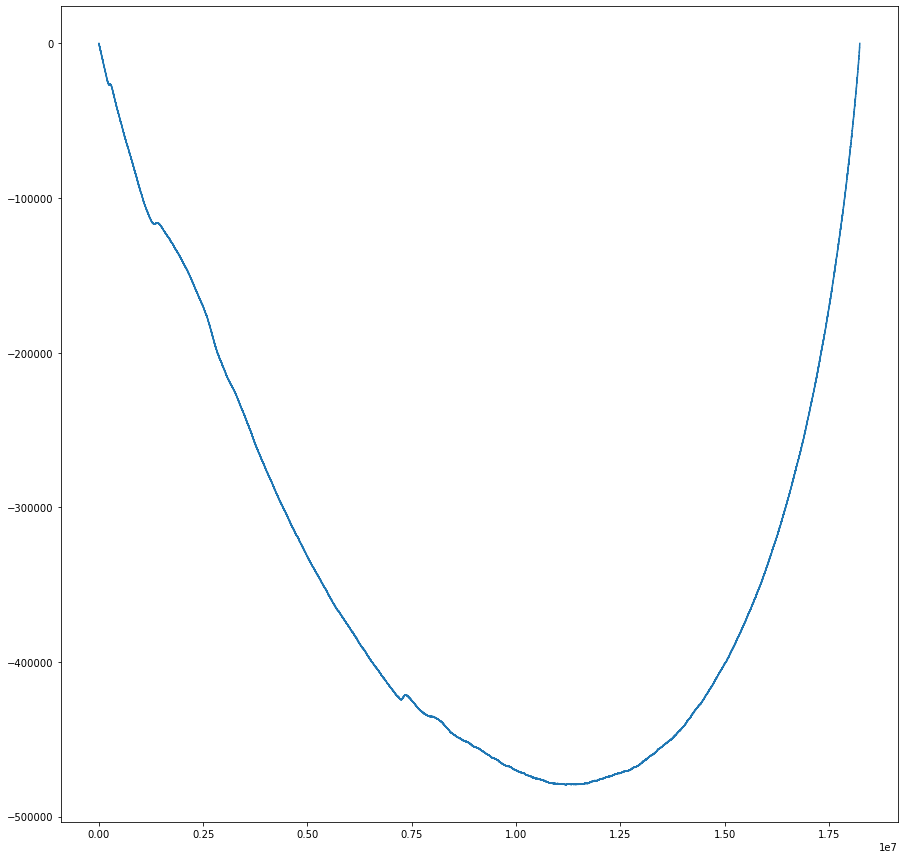

In [94]:
udb = np.sort(np.abs(np.stack(udb_shap_values).reshape(-1)))
db = np.sort(np.abs(np.stack(db_shap_values).reshape(-1)))
y_line = [0]
values = [0]
for i in range(len(udb) + len(db)):
    if len(udb) > 0 and len(db) > 0:
        if udb[0] < db[0]:
            y_line.append(y_line[-1] + 1)
            values.append(udb[0])
            udb = udb[1:]
        elif db[0] < udb[0]:
            y_line.append(y_line[-1] - 1)
            values.append(db[0])
            db = db[1:]
        else:
            y_line.append(y_line[-1])
            y_line.append(y_line[-1])
            values.append(udb[0])
            values.append(db[0])
            udb = udb[1:]
            db = db[1:]
    elif len(udb) > 0 and len(db) == 0:
        y_line.append(y_line[-1] + 1)
        values.append(udb[0])
        udb = udb[1:]
    elif len(udb) == 0 and len(db) > 0:
        y_line.append(y_line[-1] - 1)
        values.append(db[0])
        db = db[1:]
    else:
        pass
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
ax.plot(range(len(y_line)), y_line)
fig.show()

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


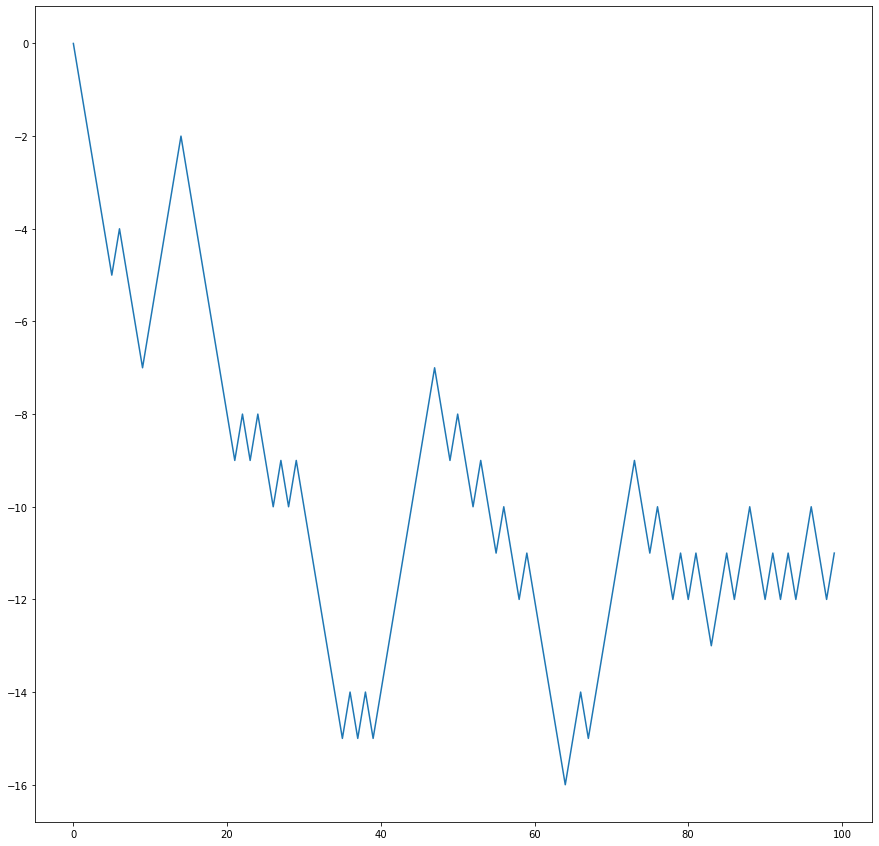

In [95]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
ax.plot(range(len(y_line[:100])), y_line[:100])
fig.show()

In [96]:
print(values[100])

1.468099100065956e-07


In [100]:
udb = np.sort(np.abs(np.stack(udb_shap_values).reshape(-1)))
db = np.sort(np.abs(np.stack(db_shap_values).reshape(-1)))
y_scat = [0]
values = [0]
for i in range(len(udb) + len(db)):
    if len(udb) > 0 and len(db) > 0:
        if udb[0] < db[0]:
            y_scat.append(1)
            values.append(udb[0])
            udb = udb[1:]
        elif db[0] < udb[0]:
            y_scat.append(-1)
            values.append(db[0])
            db = db[1:]
        else:
            y_scat.append(y_scat[-1])
            y_scat.append(y_scat[-1])
            values.append(udb[0])
            values.append(db[0])
            udb = udb[1:]
            db = db[1:]
    elif len(udb) > 0 and len(db) == 0:
        y_scat.append(1)
        values.append(udb[0])
        udb = udb[1:]
    elif len(udb) == 0 and len(db) > 0:
        y_scat.append(-1)
        values.append(db[0])
        db = db[1:]
    else:
        pass

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


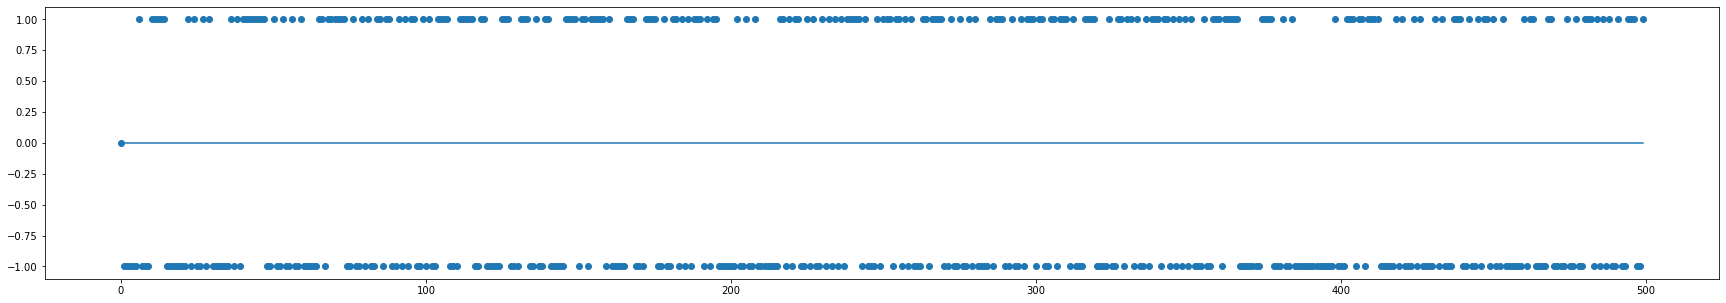

In [101]:
fig = plt.figure(figsize=(30,5))
ax = fig.add_subplot(111)
ax.scatter(range(len(y_scat[:500])), y_scat[:500])
ax.plot(range(len(y_scat[:500])), [0]*len(y_scat[:500]))
fig.show()

In [102]:
values[500]

5.733048169531685e-07

In [3]:
w2v_undebiased = gensim.models.KeyedVectors.load_word2vec_format('../data/GoogleNews-vectors-negative300.bin', binary=True)
w2v_debiased = gensim.models.KeyedVectors.load_word2vec_format('../data/GoogleNews-vectors-negative300-hard-debiased.bin', binary=True)

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


worst 20 words:
liverpool:-0.7070
nigeria:-0.7070
barca:-0.6680
madrid:-0.6211
scott:-0.6172
clinton:-0.5703
brazil:-0.5508
medicare:-0.5391
canada:-0.5352
lynch:-0.5352
toronto:-0.5234
gov:-0.5195
mirage:-0.5195
haiti:-0.5117
louisiana:-0.5117
education:-0.5078
homered:-0.5078
bleak:-0.5078
nasdaq:-0.5039
danger:-0.5000

top 20 words:
patents:0.7422
sensors:0.6914
ankle:0.6406
discs:0.6133
biometric:0.6016
hypersonic:0.5859
shoulder:0.5586
groin:0.5547
thumb:0.5430
patent:0.5430
bombs:0.5352
apology:0.5312
diplomatic:0.5273
encryption:0.5156
processors:0.5117
hamstring:0.5117
reader:0.4980
knee:0.4980
disc:0.4941
bombings:0.4883



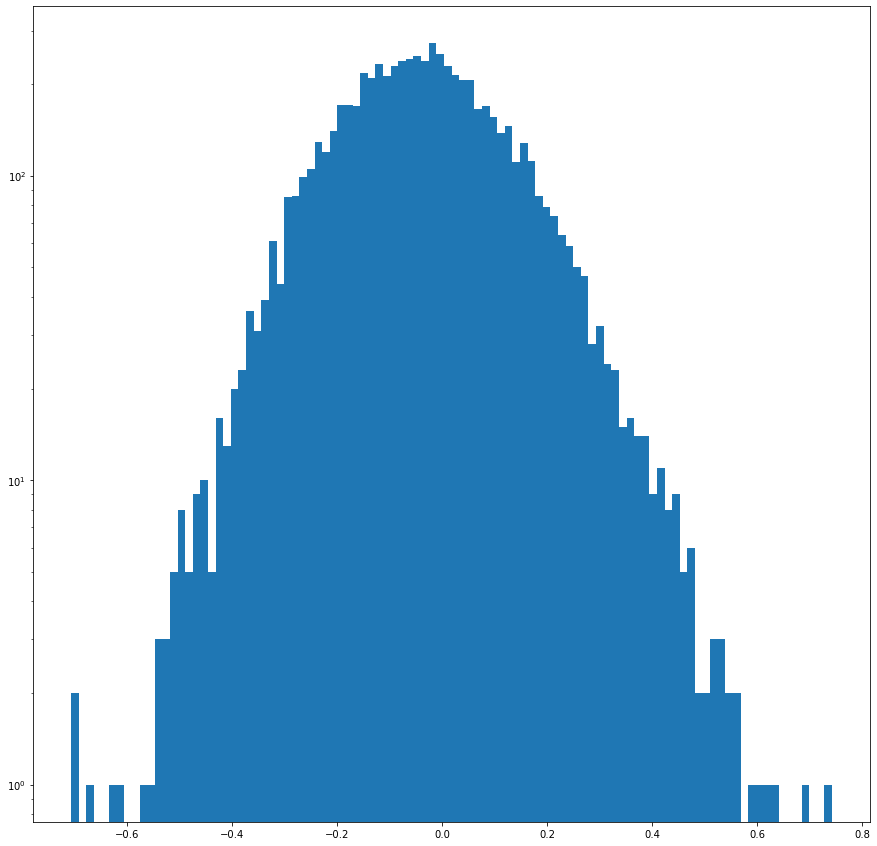

In [25]:
W2V_dim(w2v_undebiased, 203, 100, 20, filtering=3, dataset=AG_NEWS()[1])

In [16]:
keys = w2v_undebiased.key_to_index.keys()
print(len(keys))
diffs = []
db_larger = 0
udb_larger = 0
for k in keys:
    diff = (w2v_debiased[k]**2).sum() - (w2v_undebiased[k]**2).sum()
    if diff > 0:
        db_larger += 1
    elif diff < 0:
        udb_larger += 1
    diffs.append(diff)
diffs.sort()

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


# debiased larger: 352526
# undebiased larger: 2647474
range: -444.5351867675781->0.9997698068618774


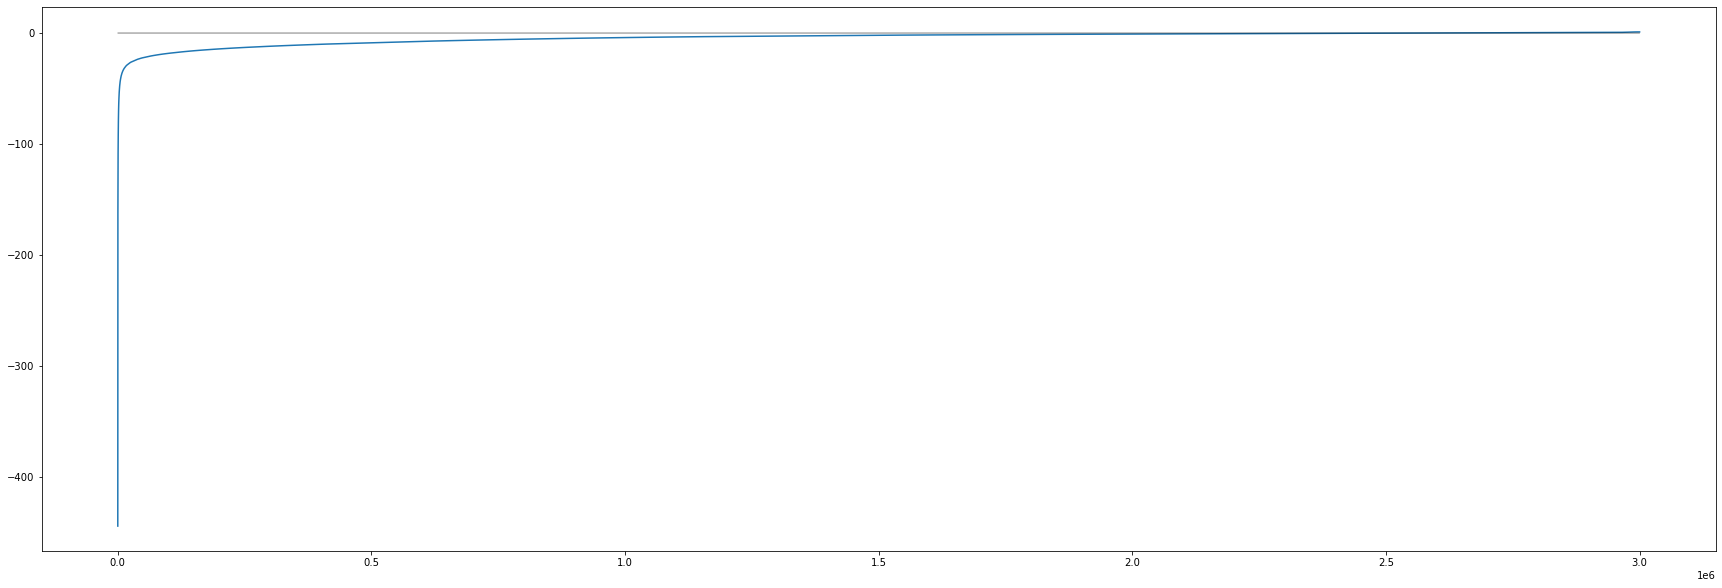

In [28]:
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(111)
ax.plot(range(len(keys)), diffs)
ax.plot(range(len(keys)), [0]*len(keys), color='black', linewidth=0.5)
fig.show()
print('# debiased larger:', db_larger)
print('# undebiased larger:', udb_larger)
print('range: {}->{}'.format(diffs[0], diffs[-1]))

ValueError: x and y must be the same size

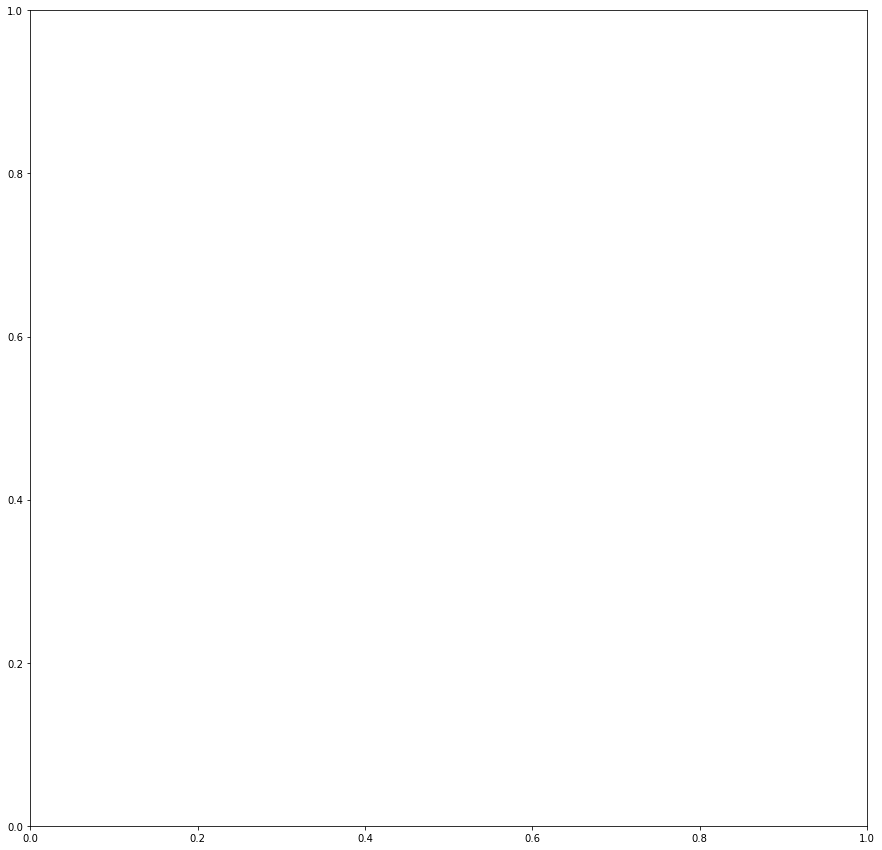

In [81]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(1,1,1)
ax.scatter(range(300), udb_shap_values[0], color='blue', label='undebised class0')
ax.scatter(range(300), db_shap_values[0], color='red', label='debised class0')
ax.scatter(range(300), udb_shap_values[1], color='green', label='undebised class1')
ax.scatter(range(300), db_shap_values[1], color='yellow', label='debised class1')
ax.plot(range(300), [0]*300, color='black')
ax.legend(loc='upper left')
fig.show()

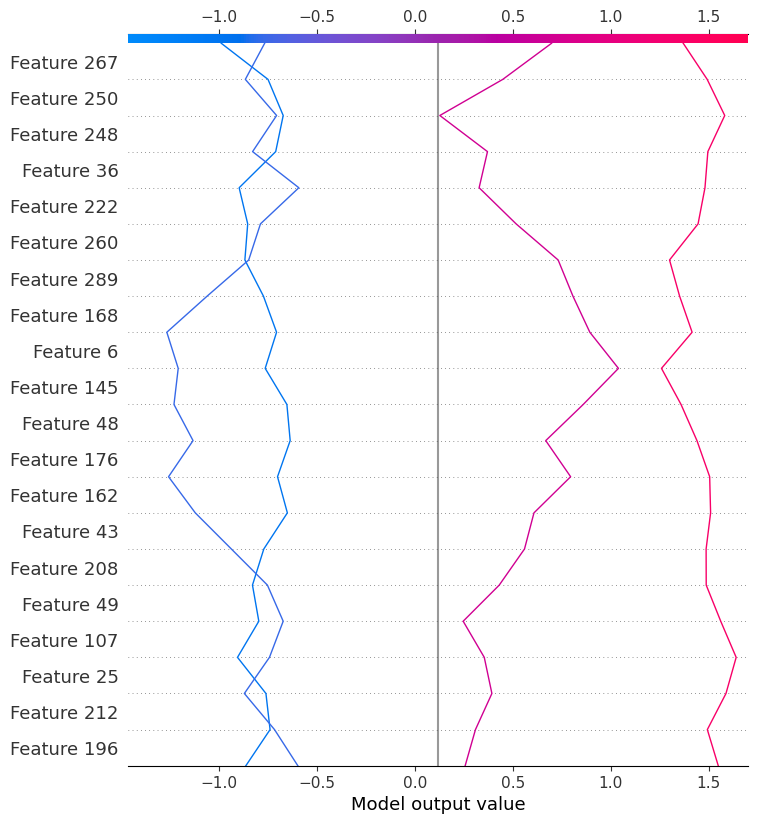

In [27]:
# それぞれの特徴量をどのように線形結合したか見れるっぽい(あんま使えない)
shap.multioutput_decision_plot(list(explainer.expected_value), shap_values, 0)

In [33]:
# ある特徴量が変化したときのshap値の変化を見る
shap.dependence_plot(0)

AttributeError: 'NoneType' object has no attribute 'shape'

In [29]:
# shap_values:4(クラス), 3(インスタンス), 300(次元)
print(len(shap_values))
for i in range(len(shap_values)):
    print(shap_values[i].shape)
shap_values[0]

4
(1, 300)
(1, 300)
(1, 300)
(1, 300)


array([[-7.83157796e-02, -4.26380709e-02, -3.33759561e-03,
         1.36020873e-02,  7.71724582e-02, -2.69062887e-03,
        -3.90210822e-02, -5.60073778e-02,  2.04136129e-02,
        -1.80289824e-03, -3.24930064e-02, -4.55690809e-02,
         6.60024874e-04,  1.38102146e-02,  1.06683439e-02,
         1.28048956e-01,  2.11081598e-02, -5.43969509e-04,
         1.51301054e-02, -3.29171345e-02, -4.56797592e-02,
         2.28249468e-02, -1.91622466e-01,  3.95210981e-02,
        -8.94157495e-03, -6.64743036e-02,  7.11168256e-03,
        -4.15815860e-02, -2.78760456e-02, -3.71179986e-03,
        -2.56903516e-03, -2.26266719e-02,  3.00054196e-02,
        -6.01618774e-02, -1.80110463e-03,  3.47573273e-02,
        -1.86097976e-02, -1.42021939e-01, -5.08012585e-02,
        -7.29719549e-03,  6.54479340e-02, -1.29749198e-02,
        -5.46055362e-02, -1.99726503e-02, -4.33305055e-02,
         1.77033488e-02, -8.23624214e-05, -5.05792573e-02,
        -2.62424592e-02,  1.08337319e-02, -1.61391534e-0

# DBpedia

# YelpReviewPolarity